In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


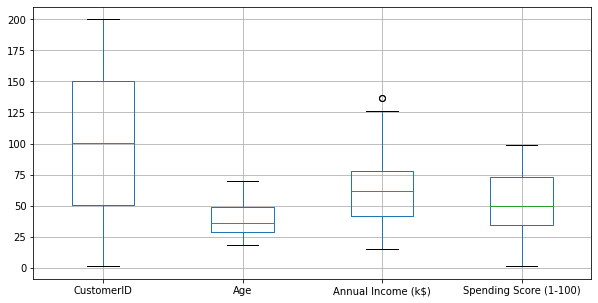

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(data.boxplot())
plt.show()

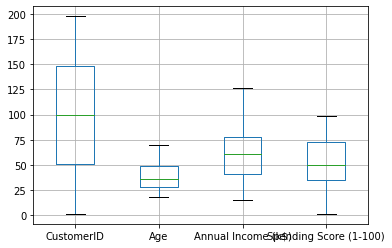

In [6]:
data.drop(data[data['Annual Income (k$)']>130].index,inplace=True)
data.boxplot()  

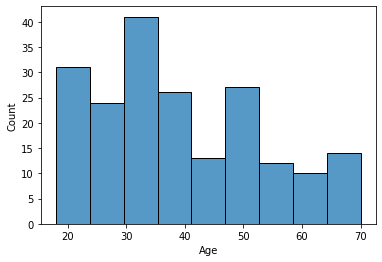

In [7]:
sns.histplot(data['Age'])

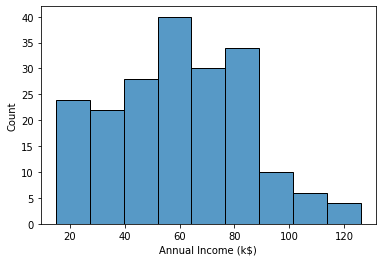

In [8]:
sns.histplot(data['Annual Income (k$)'])

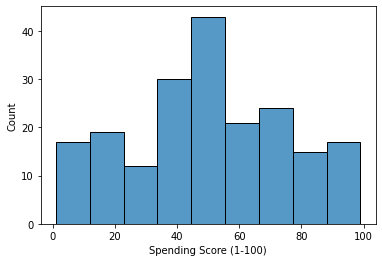

In [9]:
sns.histplot(data['Spending Score (1-100)'])

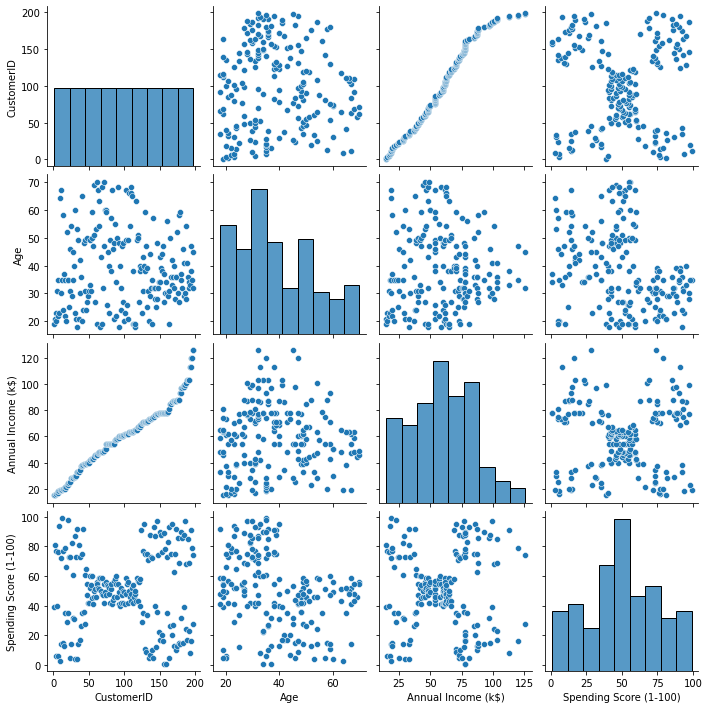

In [10]:
sns.pairplot(data)

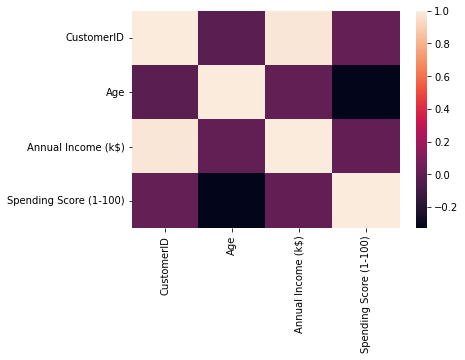

In [11]:
sns.heatmap(data.corr())

In [12]:
encode = LabelEncoder()
data['Gender']=encode.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
scaling = MinMaxScaler()
data[['Annual Income (k$)']]=scaling.fit_transform(data[['Annual Income (k$)']])
data[['Spending Score (1-100)']]=scaling.fit_transform(data[['Spending Score (1-100)']])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.009009,0.051020
3,4,0,23,0.009009,0.775510
4,5,0,31,0.018018,0.397959


In [14]:
clus=data.iloc[:, [3,4]].values

In [15]:
kmeans = KMeans(n_clusters=5,random_state=0)
label = data['Cluster'] = kmeans.fit_predict(clus)

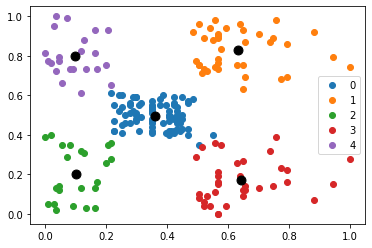

In [16]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(clus[label == i,0] , clus[label == i,1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

In [17]:
data['Cluster'] = data['Cluster'].astype("category")

In [18]:
X=data.drop(['CustomerID','Cluster'],axis=1)
y=data['Cluster']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [19]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [20]:
y_predict = model.predict(X_test)

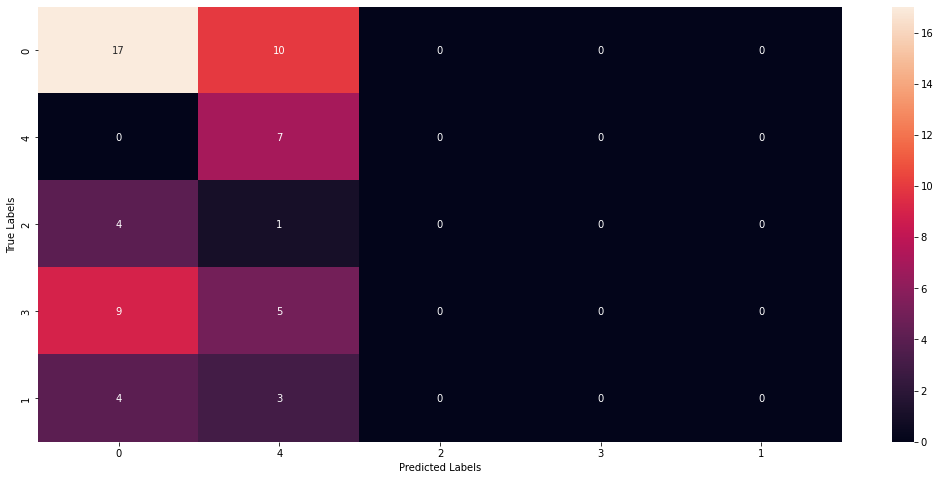

In [21]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [22]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56        27
           1       0.27      1.00      0.42         7
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         7

    accuracy                           0.40        60
   macro avg       0.15      0.33      0.20        60
weighted avg       0.26      0.40      0.30        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
